In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Analizar y comparar
- Tiempo de ejecucion de cada uno
- Gap: greedy vs batching y batching vs batching ratio y greedy vs ratio
- ratios de cada uno
- valor objetivo 

In [2]:
df = pd.read_csv('results.csv')

In [3]:
df['gap'] = (df['ObjValG'] - df['ObjValB']) / df['ObjValB']
df['gapR'] = (df['ObjValBR'] - df['ObjValB']) / df['ObjValB']

df.head()

,size,n,timeG,timeB,timeBR,ObjValG,ObjValB,ObjValBR,PrecioKmG,PrecioKmB,PrecioKmBRatio,gap,gapR
0,xl,500,1579,77081,57886,1655.3,1371.2,1454.3,3.02480,2.83826,3.81290,0.207191,0.060604
1,xl,500,1536,74894,62983,1605.1,1412.8,1489.0,3.73220,2.89086,5.25118,0.136113,0.053935
2,xl,500,1617,69866,66784,1486.9,1270.6,1349.0,3.62779,3.03410,5.02640,0.170235,0.061703
3,xl,500,1556,73654,61638,1390.2,1174.4,1256.7,4.04412,3.14362,4.85615,0.183753,0.070078
4,xl,500,1538,66771,67187,1467.0,1291.7,1360.8,3.48375,3.00871,4.51199,0.135713,0.053495


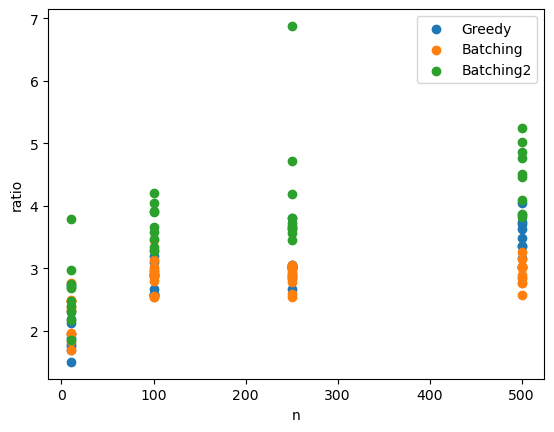

In [4]:
fig, ax = plt.subplots()

ax.scatter(df['n'], df['PrecioKmG'], label='Greedy')
ax.scatter(df['n'], df['PrecioKmB'], label='Batching')
ax.scatter(df['n'], df['PrecioKmBRatio'], label='Batching2')
ax.legend()

ax.set_ylabel("ratio")
ax.set_xlabel('n')
plt.show()

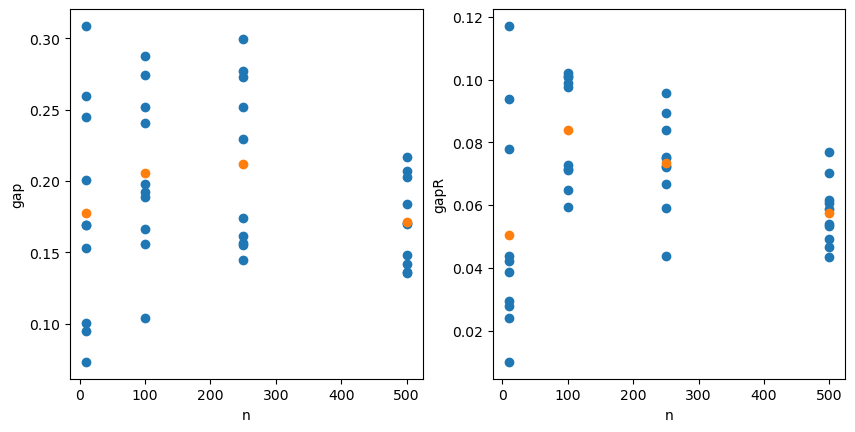

In [5]:
fig, (ax, ax2)= plt.subplots(1, 2)
fig.set_figwidth(10)

ax.scatter(df['n'], df['gap'])
promedios = []
sizes = [10, 100, 250, 500]
for i in range(4):
    promedios.append(sum(df[df['n'] == sizes[i]]['gap'])/10)
ax.scatter(sizes, promedios)
ax.set_ylabel("gap")
ax.set_xlabel('n')

ax2.scatter(df['n'], df['gapR'])
promedios = []
sizes = [10, 100, 250, 500]
for i in range(4):
    promedios.append(sum(df[df['n'] == sizes[i]]['gapR'])/10)
ax2.scatter(sizes, promedios)
ax2.set_ylabel("gapR")
ax2.set_xlabel('n')



plt.show()

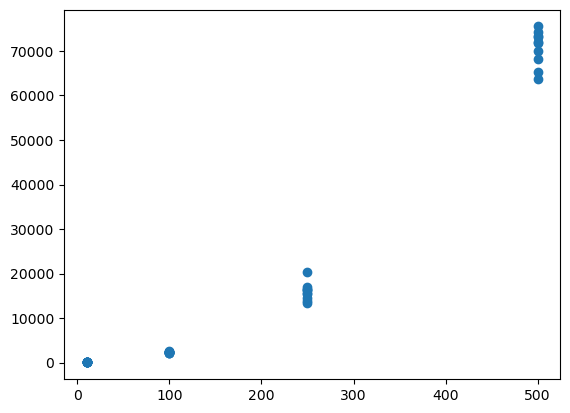

In [6]:
df['dif_time'] = (df['timeB'] - df['timeG'])
plt.scatter(df['n'], df['dif_time'])

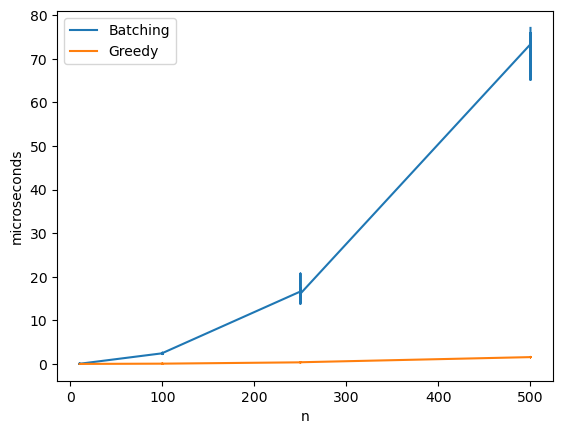

In [7]:
fig1, ax1 = plt.subplots()

timeb = ax1.plot(df['n'], df['timeB']/1000, label='Batching')
timeg = ax1.plot(df['n'], df['timeG']/1000, label='Greedy')
ax1.legend()
ax1.set_ylabel('microseconds')
ax1.set_xlabel('n')

plt.show()

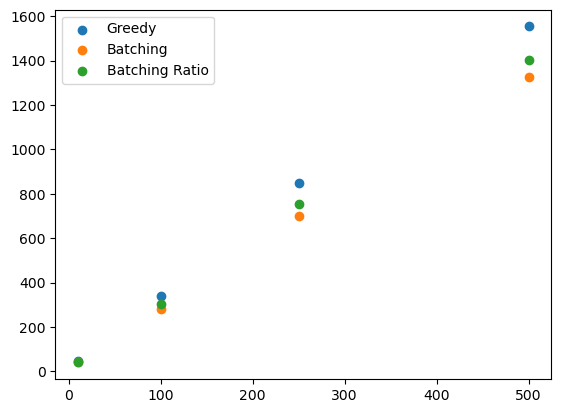

In [8]:
fig1, ax2 = plt.subplots()

promediosG = []
sizes = [10, 100, 250, 500]
for i in range(4):
    promediosG.append(sum(df[df['n'] == sizes[i]]['ObjValG'])/10)

promediosB = []
for i in range(4):
    promediosB.append(sum(df[df['n'] == sizes[i]]['ObjValB'])/10)

promediosBR = []
for i in range(4):
    promediosBR.append(sum(df[df['n'] == sizes[i]]['ObjValBR'])/10)


ax2.scatter(sizes, promediosG, label="Greedy")
ax2.scatter(sizes, promediosB, label="Batching")
ax2.scatter(sizes, promediosBR, label="Batching Ratio")
ax2.legend()

plt.show()

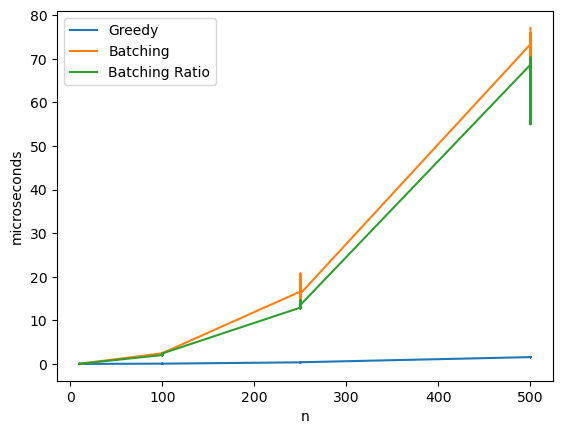

In [31]:
fig1, ax1 = plt.subplots()

timeg = ax1.plot(df['n'], df['timeG']/1000, label='Greedy')
timeb = ax1.plot(df['n'], df['timeB']/1000, label='Batching')
timebr = ax1.plot(df['n'], df['timeBR']/1000, label='Batching Ratio')
ax1.legend()
ax1.set_ylabel('microseconds')
ax1.set_xlabel('n')

plt.show()

In [43]:
#armos csv nuevo llamado tiempos_promedio que tenga únicamente los N y los TIEMPOS DE EJECUCIÓN PROMEDIO para cada estrategia

promedios_timeG = []
sizes = [10, 100, 250, 500]
for i in range(4):
    promedios_timeG.append(sum(df[df['n'] == sizes[i]]['timeG'])/10)

promedios_timeB = []
for i in range(4):
    promedios_timeB.append(sum(df[df['n'] == sizes[i]]['timeB'])/10)

promedios_timeBR = []
for i in range(4):
    promedios_timeBR.append(sum(df[df['n'] == sizes[i]]['timeBR'])/10)

data = [
    {'n': 10 , 'Prom_timeG': promedios_timeG[0] , 'Prom_timeB': promedios_timeB[0] , 'Prom_timeBR': promedios_timeBR[0]},
    {'n': 100 , 'Prom_timeG': promedios_timeG[1] , 'Prom_timeB': promedios_timeB[1] , 'Prom_timeBR': promedios_timeBR[1]},
    {'n': 250 , 'Prom_timeG': promedios_timeG[2] , 'Prom_timeB': promedios_timeB[2] , 'Prom_timeBR': promedios_timeBR[2]},
    {'n': 500 , 'Prom_timeG': promedios_timeG[3] , 'Prom_timeB': promedios_timeB[3] , 'Prom_timeBR': promedios_timeBR[3]},
]

df2 = pd.DataFrame(data)

ruta_archivo = 'tiempos_promedio.csv'

df2.to_csv(ruta_archivo, index=False)


df2.head()

,n,Prom_timeG,Prom_timeB,Prom_timeBR
0,10,1.0,37.1,33.0
1,100,62.2,2411.3,2137.4
2,250,371.6,16306.6,13332.1
3,500,1561.5,72298.8,63872.0


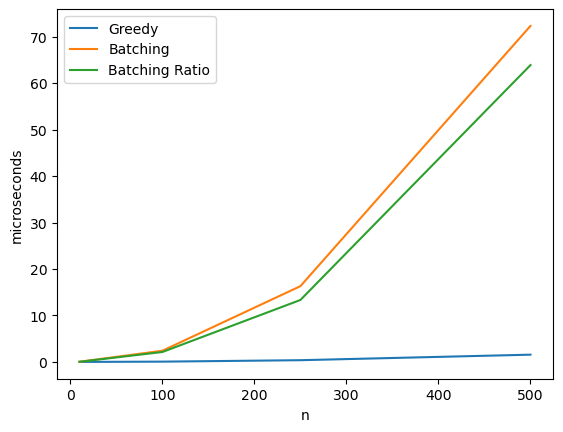

In [44]:
fig1, ax1 = plt.subplots()

timeg = ax1.plot(df2['n'], df2['Prom_timeG']/1000, label='Greedy')
timeb = ax1.plot(df2['n'], df2['Prom_timeB']/1000, label='Batching')
timebr = ax1.plot(df2['n'], df2['Prom_timeBR']/1000, label='Batching Ratio')
ax1.legend()
ax1.set_ylabel('microseconds')
ax1.set_xlabel('n')

plt.show()